# Inspect the output of the nonstationary internal tide spectral parameters

cf `InternalTideClimate/NOTEBOOKS/analyse_suntans_ssh_harmonics.ipynb`

In [18]:
import sfoda.suntans.sunxarray as sxr

import glob
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from cmocean import cm
from s3fs import S3FileSystem, S3Map

In [19]:

import nonstat_itides as nsit

In [20]:
# s3login = '/home/mrayson/code/s3.acacia.login'
s3login = '/home/jupyter-ubuntu/s3.acacia.login'

with open(s3login) as f:
    lines = f.readlines()

url, key, secret = [ff.strip('\n') for ff in lines[0:3]]
s3 = S3FileSystem(client_kwargs={'endpoint_url':url},
            key=key,
            secret=secret)

In [21]:
# paramsfile = '../DATA/NWS_2km_GLORYS_nonstat_itide_params_seasonaltides_D2D1_v3.nc'
# paramsfile = '../DATA/NWS_2km_GLORYS_nonstat_itide_params_seasonaltides_v2.nc'
# paramsfile = '../DATA/NWS_2km_GLORYS_nonstat_itide_params_seasonaltides_S2K1.nc'
# paramsfile = '../DATA/NWS_2km_GLORYS_nonstat_itide_params_seasonaltides_D2D1.nc'
# paramsfile = '../DATA/NWS_2km_GLORYS_nonstat_itide_params_seasonaltides_D2D1_v8.nc' # Good one...
paramsfile = '../DATA/NWS_2km_GLORYS_nonstat_itide_params_seasonaltides_D2D1_eta.nc'

# paramsfile = '../DATA/NWS_2km_GLORYS_nonstat_itide_params_astrotides_D2D1.nc'


In [22]:
# f = S3Map("uwaoceanprocesses-suntans/"+paramsfile, s3=s3)
# ds_params = xr.open_dataset(f, engine='zarr', chunks={}, consolidated=False)

ds_params = xr.open_dataset(paramsfile, engine='h5netcdf')
# These need filling in??
ds_params.suntans.xv=ds_params.xv.values
ds_params.suntans.yv=ds_params.yv.values

ds_params

Changing the _FillValue from -999999 to 999999


<xarray.Dataset>
Dimensions:  (Nc: 225368, numsides: 8, params: 7, Nk: 80, time: 8761, Np: 454016)
Coordinates:
  * time     (time) datetime64[ns] 2013-07-01T00:01:00 ... 2014-07-01
    z_r      (Nk) float64 ...
Dimensions without coordinates: Nc, numsides, params, Nk, Np
Data variables:
    cells    (Nc, numsides) int32 3058 3061 3060 2801 ... 316184 316187 -1 -1
    data     (Nc, params) float64 ...
    dv       (Nc) float64 ...
    dz       (Nk) float64 ...
    nfaces   (Nc) int32 6 6 6 6 6 6 6 6 6 6 6 6 6 ... 6 6 6 6 6 6 6 6 6 6 6 6 6
    xp       (Np) float64 125.2 114.2 136.3 125.4 ... 117.0 117.0 117.1 117.1
    xv       (Nc) float64 109.0 109.1 109.1 109.2 ... 117.7 117.7 117.7 117.9
    yp       (Np) float64 -14.48 -22.48 -13.24 -14.54 ... -18.27 -18.27 -18.26
    yv       (Nc) float64 -19.4 -19.5 -19.61 -19.71 ... -13.1 -13.12 -13.07
Attributes:
    Author:       mrayson
    Description:  SUNTANS surface fields

In [23]:
datafile = ds_params['data'].attrs['input file']
datafile

'NWS_2km_GLORYS_2013_2014_ssh_filtered_seasonaltides.zarr'

In [24]:
f = S3Map("uwaoceanprocesses-suntans/"+datafile, s3=s3)
ds_data = xr.open_dataset(f, engine='zarr', chunks={}, consolidated=False)

# These need filling in??
ds_data.suntans.xv=ds_data.xv.values
ds_data.suntans.yv=ds_data.yv.values

ds_data

Changing the _FillValue from -999999 to 999999


<xarray.Dataset>
Dimensions:               (Nc: 225368, numsides: 8, Nk: 80, time: 8761, Np: 454016)
Coordinates:
  * time                  (time) datetime64[ns] 2013-07-01T00:01:00 ... 2014-...
    z_r                   (Nk) float64 dask.array<chunksize=(80,), meta=np.ndarray>
Dimensions without coordinates: Nc, numsides, Nk, Np
Data variables:
    cells                 (Nc, numsides) int32 dask.array<chunksize=(2000, 8), meta=np.ndarray>
    dv                    (Nc) float64 dask.array<chunksize=(2000,), meta=np.ndarray>
    dz                    (Nk) float64 dask.array<chunksize=(80,), meta=np.ndarray>
    eta_non_phase_locked  (time, Nc) float64 dask.array<chunksize=(8761, 2000), meta=np.ndarray>
    eta_phase_locked      (time, Nc) float64 dask.array<chunksize=(8761, 2000), meta=np.ndarray>
    nfaces                (Nc) int32 dask.array<chunksize=(2000,), meta=np.ndarray>
    xp                    (Np) float64 dask.array<chunksize=(454016,), meta=np.ndarray>
    xv                    (Nc) float64 dask.array<chunksize=(2000,), meta=np.ndarray>
    yp                    (Np) float64 dask.array<chunksize=(454016,), meta=np.ndarray>
    yv                    (Nc) float64 dask.array<chunksize=(2000,), meta=np.ndarray>
Attributes:
    Author:       mrayson
    Description:  SUNTANS surface fields

In [25]:
import matplotlib.pyplot as plt

In [26]:
plt.rcParams['font.size']=14
plt.rcParams['axes.labelsize']='large'
plt.rcParams['pcolor.shading']='auto'

Text(0.5, 1.0, '$\\gamma$ parameter')

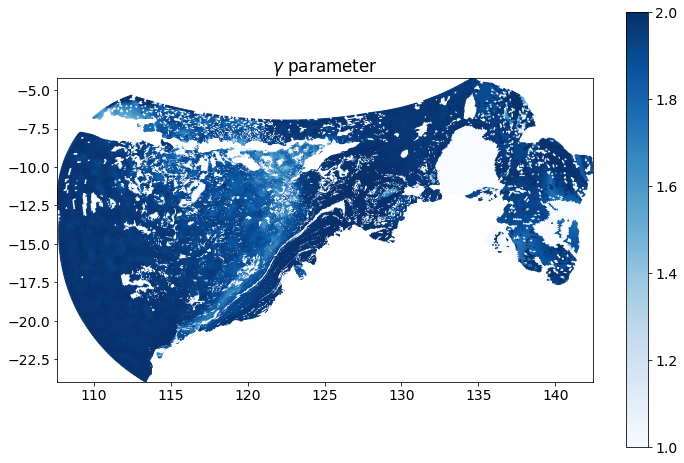

In [27]:
plt.figure(figsize=(12,8))
ax=plt.subplot(111)
# ds_params.suntans.plotcelldata(nsit.invlogit(ds_params['data'].isel(params=4),scale=2), cmap='Blues', vmin=0,vmax=2)
ds_params.suntans.plotcelldata(ds_params['data'].isel(params=4), cmap='Blues', vmin=1,vmax=2)

plt.title('$\gamma$ parameter')
# ax1.set_xlim(xlim)
# ax1.set_ylim(ylim)
# ax1.set_xticklabels([])
    

In [28]:
# Regional plots

def plot_params(ds_params, xlim, ylim):
    fig = plt.figure(figsize=(12,8))

    ax1=plt.subplot(221, facecolor='0.5')
    ds_params.suntans.plotcelldata(ds_params['data'].isel(params=0)*100, cmap='Reds', vmin=0,vmax=2)
    plt.title('Incoherent D2 amplitude [cm]')
    ax1.set_xlim(xlim)
    ax1.set_ylim(ylim)
    ax1.set_xticklabels([])
    
    ax2=plt.subplot(222, facecolor='0.5')
    ds_params.suntans.plotcelldata(ds_params['data'].isel(params=1), cmap='viridis', vmin=0, vmax=10)
    plt.title('Incoherent D2 decay time scale [days]')
    ax2.set_xlim(xlim)
    ax2.set_ylim(ylim)
    ax2.set_yticklabels([])
    ax2.set_xticklabels([])

    ax3=plt.subplot(223, facecolor='0.5')
    ds_params.suntans.plotcelldata(ds_params['data'].isel(params=2)*100, cmap='Reds', vmin=0,vmax=2)
    plt.title('Incoherent D1 amplitude [cm]')
    ax3.set_xlim(xlim)
    ax3.set_ylim(ylim)

    ax4=plt.subplot(224, facecolor='0.5')
    ds_params.suntans.plotcelldata(ds_params['data'].isel(params=3), cmap='viridis', vmin=0, vmax=10)
    plt.title('Incoherent D1 decay time scale [days]')
    ax4.set_xlim(xlim)
    ax4.set_ylim(ylim)
    ax4.set_yticklabels([])

    plt.tight_layout()
    return ax1, ax2, ax3, ax4

def plot_gamma(ds_params, xlim, ylim):
    fig = plt.figure(figsize=(12,4))

    ax1=plt.subplot(121, facecolor='0.5')
    ds_params.suntans.plotcelldata(ds_params['data'].isel(params=4), cmap='Blues', vmin=1,vmax=2)

    plt.title('D2 $\gamma$ parameter')
    ax1.set_xlim(xlim)
    ax1.set_ylim(ylim)
    #ax1.set_xticklabels([])
    
    ax2=plt.subplot(122, facecolor='0.5')
    ds_params.suntans.plotcelldata(ds_params['data'].isel(params=5), cmap='Blues', vmin=1,vmax=2)

    plt.title('D1 $\gamma$ parameter')
    ax2.set_xlim(xlim)
    ax2.set_ylim(ylim)
    ax2.set_yticklabels([])
    #ax2.set_xticklabels([])

def plot_params_K1O1(ds_params, xlim, ylim):
    fig = plt.figure(figsize=(12,8))

    ax1=plt.subplot(221, facecolor='0.5')
    ds_params.suntans.plotcelldata(np.exp(ds_params['data'].isel(params=4))*1e4, cmap='Reds', vmin=0,vmax=200)
    plt.title('Incoherent K1 variance [cm$^2$]')
    ax1.set_xlim(xlim)
    ax1.set_ylim(ylim)
    ax1.set_xticklabels([])
    
    ax2=plt.subplot(222, facecolor='0.5')
    ds_params.suntans.plotcelldata(np.exp(ds_params['data'].isel(params=5)), cmap='viridis', vmin=0, vmax=10)
    plt.title('Incoherent K1 decay time scale [days]')
    ax2.set_xlim(xlim)
    ax2.set_ylim(ylim)
    ax2.set_yticklabels([])
    ax2.set_xticklabels([])

    ax3=plt.subplot(223, facecolor='0.5')
    ds_params.suntans.plotcelldata(np.exp(ds_params['data'].isel(params=6))*1e4, cmap='Reds', vmin=0,vmax=200)
    plt.title('Incoherent O1 variance [cm$^2$]')
    ax3.set_xlim(xlim)
    ax3.set_ylim(ylim)

    ax4=plt.subplot(224, facecolor='0.5')
    ds_params.suntans.plotcelldata(np.exp(ds_params['data'].isel(params=7)), cmap='viridis', vmin=0, vmax=10)
    plt.title('Incoherent O1 decay time scale [days]')
    ax4.set_xlim(xlim)
    ax4.set_ylim(ylim)
    ax4.set_yticklabels([])

    plt.tight_layout()
    return ax1, ax2, ax3, ax4


(<AxesSubplot:title={'center':'Incoherent D2 amplitude [cm]'}>,
 <AxesSubplot:title={'center':'Incoherent D2 decay time scale [days]'}>,
 <AxesSubplot:title={'center':'Incoherent D1 amplitude [cm]'}>,
 <AxesSubplot:title={'center':'Incoherent D1 decay time scale [days]'}>)

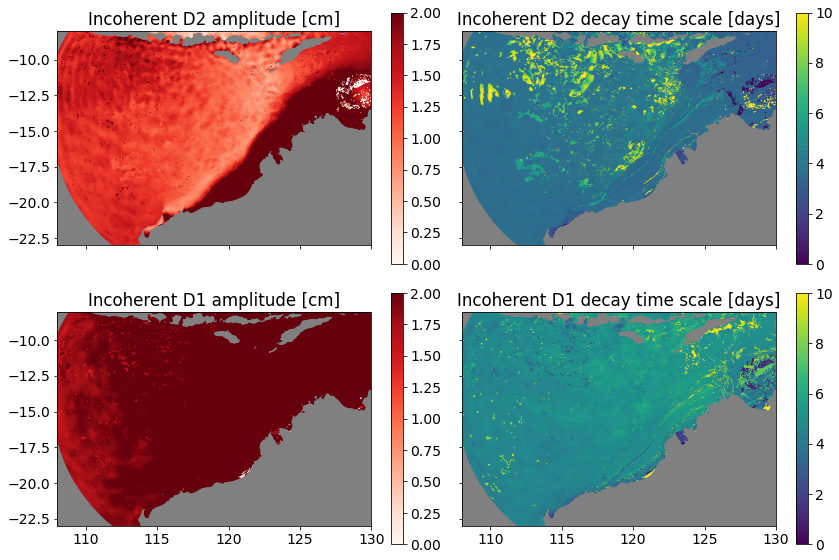

In [29]:
xlim = 108, 130
ylim = -23, -8
plot_params(ds_params, xlim, ylim)
# plt.savefig('../FIGURES/suntans_ic_itide_params.png',dpi=150)

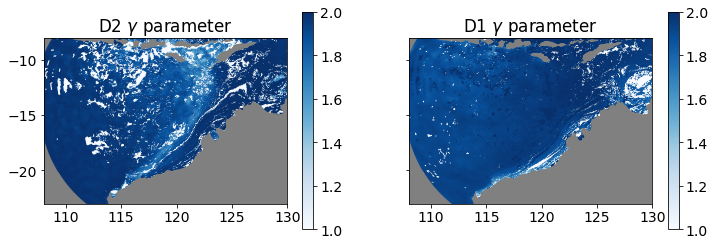

In [30]:
xlim = 108, 130
ylim = -23, -8
plot_gamma(ds_params, xlim, ylim)

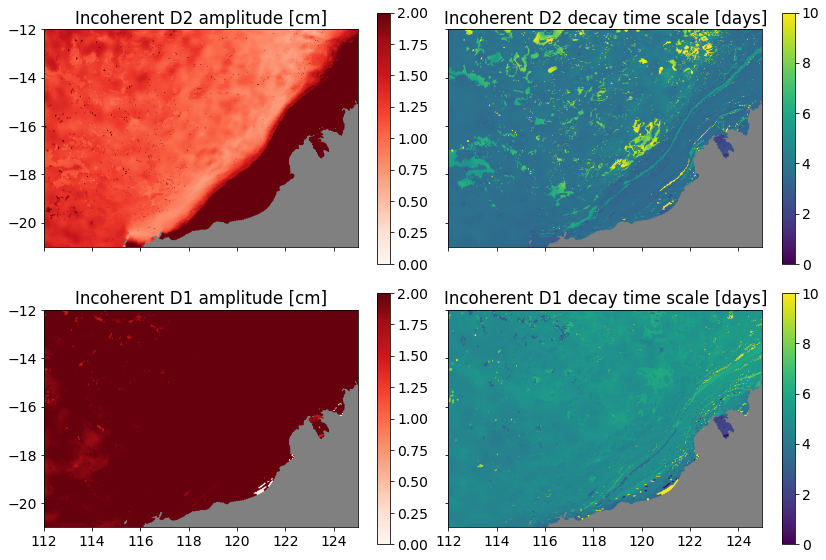

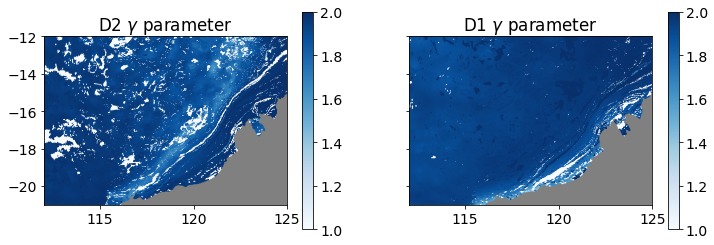

In [31]:
# NWSregion
xlim = 112, 125
ylim = -21, -12
plot_params(ds_params, xlim, ylim)

plot_gamma(ds_params, xlim, ylim)

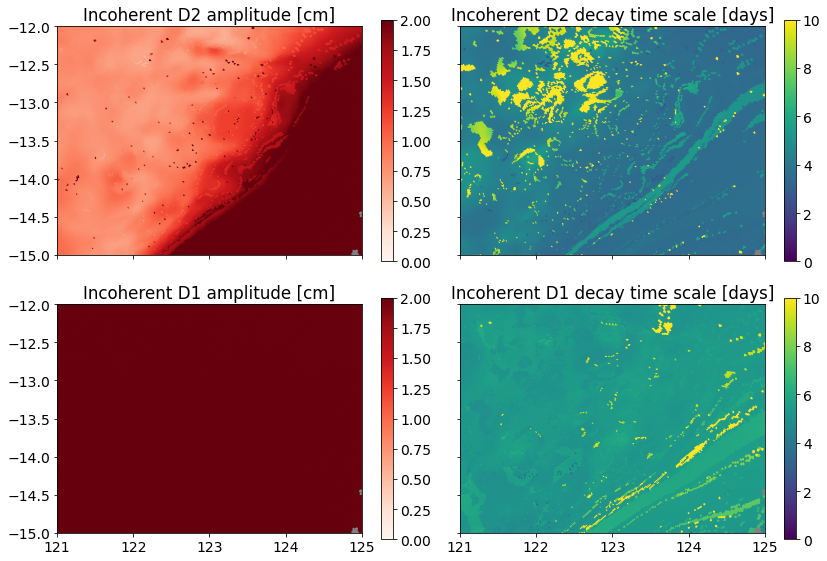

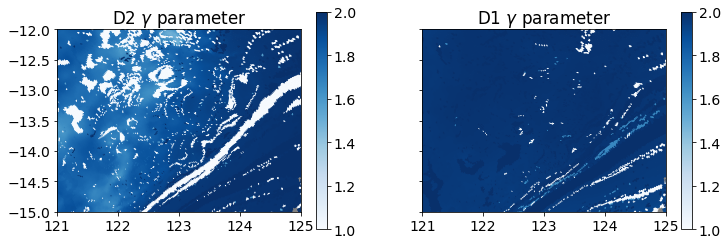

In [32]:
# Shelf region
xlim = 121, 125
ylim = -15, -12
plot_params(ds_params, xlim, ylim)

plot_gamma(ds_params, xlim, ylim)

(<AxesSubplot:title={'center':'Incoherent D2 amplitude [cm]'}>,
 <AxesSubplot:title={'center':'Incoherent D2 decay time scale [days]'}>,
 <AxesSubplot:title={'center':'Incoherent D1 amplitude [cm]'}>,
 <AxesSubplot:title={'center':'Incoherent D1 decay time scale [days]'}>)

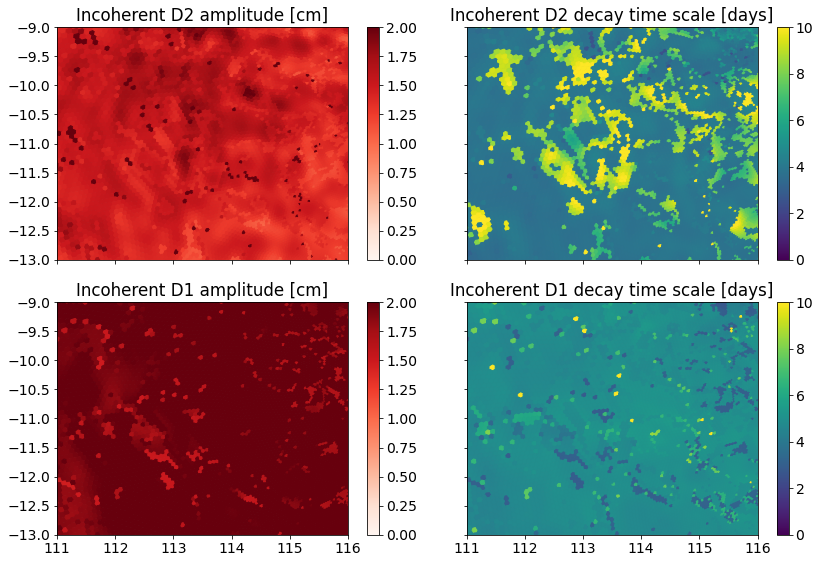

In [33]:
# ITF region
xlim = 111, 116
ylim = -13, -9
plot_params(ds_params, xlim, ylim)

In [34]:
acffunc = getattr(nsit, ds_params['data'].attrs['covariance function'])
acffunc

<function nonstat_itides.oscillate_D2D1_gammaexp(x, xpr, params, lt=[0.5087625254259195, 1.0365377358479884])>

In [38]:
# Do a spectral plot

def plot_site(xpt, ypt, c='k'):
    data_pt = nsit.extract_point(ds_data, xpt, ypt)
    tdays = (data_pt.time-data_pt.time[0]).values.astype(float)/1e9/86400
    dt = tdays[1]-tdays[0]
    params_pt = nsit.extract_point(ds_params, xpt, ypt)
    acf = acffunc(tdays, tdays[0], [ff for ff in params_pt['data'].data])

    #y = data_pt['eta_steric_non_phase_locked']
    y = data_pt['eta_non_phase_locked']

    f, I =  nsit.periodogram(y, delta=dt)
    f_S, S = nsit.bochner(acf, delta=dt)
    plt.figure()
    ax=plt.subplot(111)
    plt.semilogy(f, I, c, lw=0.2)
    plt.semilogy(f_S,S,c, ls='--', lw=2)
    ax.set_ylim(1e-8, 1e-2)
    plt.xlim(0.8, 2.4)
    plt.xlabel('f [cpd]')
    
    #print(np.exp(params_pt['data'][0:4].data))
    #print(np.exp(params_pt['data'][-1].data))
    #print(nsit.invlogit(params_pt['data'][4:6].data, scale=2))
    print(params_pt['data'].values)


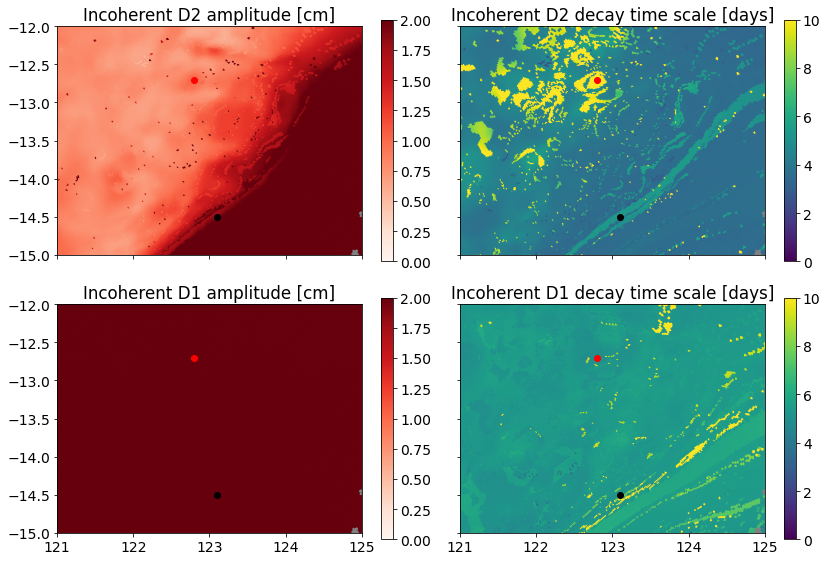

In [36]:
# Shelf region
xlim = 121, 125
ylim = -15, -12
ax1,ax2,ax3,ax4 = plot_params(ds_params, xlim, ylim)

xpt1, ypt1 = 122.8,-12.7
# xpt2, ypt2 = 122.0,-12.9
# xpt2, ypt2 = 123.1,-12.9
xpt2, ypt2 = 123.1,-14.5

ax1.plot(xpt1,ypt1,'ro')
ax2.plot(xpt1,ypt1,'ro')
ax3.plot(xpt1,ypt1,'ro')
ax4.plot(xpt1,ypt1,'ro')
ax1.plot(xpt2,ypt2,'ko')
ax2.plot(xpt2,ypt2,'ko')
ax3.plot(xpt2,ypt2,'ko')
ax4.plot(xpt2,ypt2,'ko')

[1.01673721e-02 1.35918693e+01 2.45840293e-02 4.93849989e+00
 1.00000000e+00 1.98356154e+00 1.26080072e-15]
[1.88855186e-02 5.37103931e+00 2.91297435e-02 5.22845014e+00
 1.00000000e+00 1.98463312e+00 1.35240587e-15]


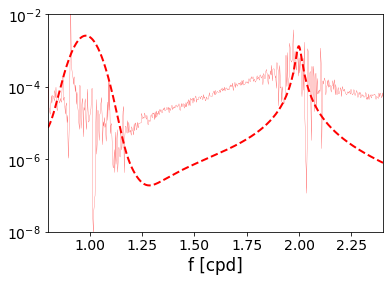

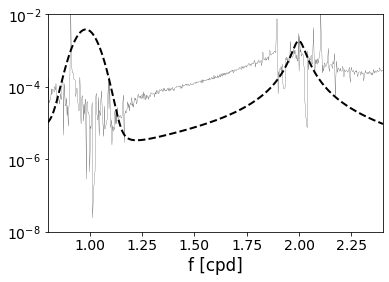

In [39]:
plot_site(xpt1, ypt1, c='r')
plot_site(xpt2, ypt2, c='k')

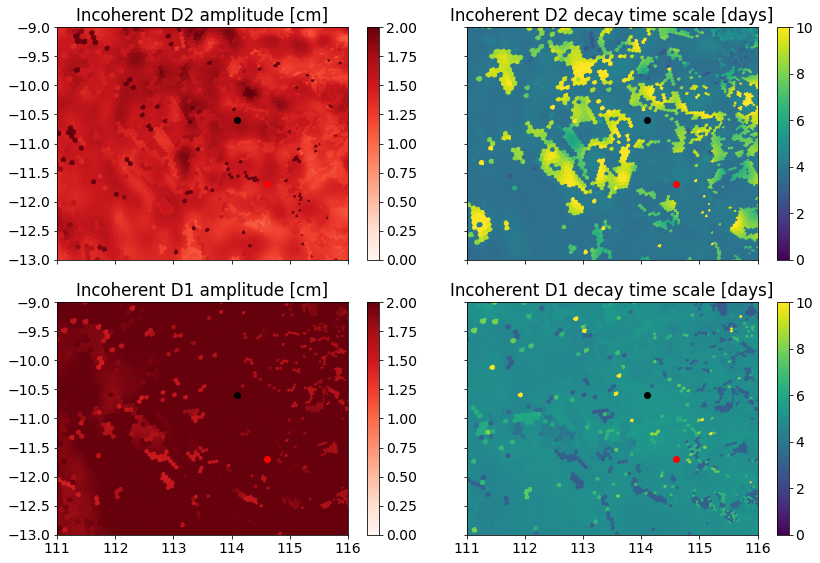

In [40]:
# ITF region
xlim = 111, 116
ylim = -13, -9
ax1, ax2,ax3, ax4=plot_params(ds_params, xlim, ylim)

xpt1, ypt1 = 114.6,-11.7
xpt2, ypt2 = 114.1,-10.6
ax1.plot(xpt1,ypt1,'ro')
ax2.plot(xpt1,ypt1,'ro')
ax3.plot(xpt1,ypt1,'ro')
ax4.plot(xpt1,ypt1,'ro')
ax1.plot(xpt2,ypt2,'ko')
ax2.plot(xpt2,ypt2,'ko')
ax3.plot(xpt2,ypt2,'ko')
ax4.plot(xpt2,ypt2,'ko')

[1.55277573e-02 4.16790336e+00 2.31893492e-02 5.01246195e+00
 1.92583323e+00 1.91817795e+00 2.30134289e-15]
[1.67386902e-02 4.17078539e+00 2.37589055e-02 5.12980722e+00
 1.82503109e+00 1.85248827e+00 2.53337906e-15]


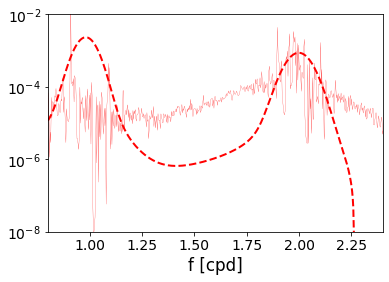

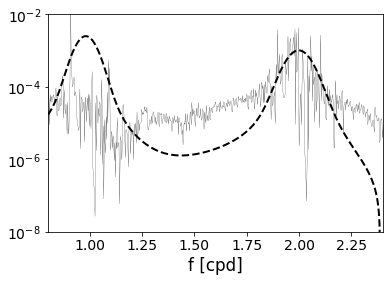

In [41]:
plot_site(xpt1, ypt1, c='r')
plot_site(xpt2, ypt2, c='k')